In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [6]:
# Set date
start_date = pd.Timestamp("2006-07-01", tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-01', tz='America/New_York').isoformat()


In [7]:
# Tickers for an all-weather set and forget portfolio 
tickers = ["SPY", "TLT", "IEF", "GLD", "DJP"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [8]:
# MC Simulation 
start_date = pd.Timestamp('2006-07-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-01', tz='America/New_York').isoformat()

In [10]:
# 10 years of data
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


C:\Users\Admin\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:8: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  


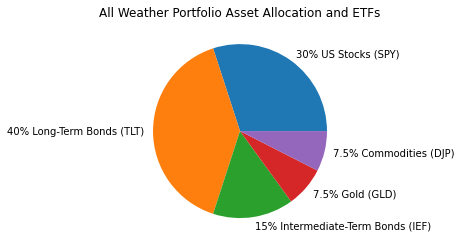

In [11]:
import matplotlib.pyplot as plt

y = np.array([30, 40, 15, 7.5, 7.5])
mylabels = ["30% US Stocks (SPY)", "40% Long-Term Bonds (TLT)", "15% Intermediate-Term Bonds (IEF)", "7.5% Gold (GLD)", "7.5% Commodities (DJP)"]
plt.pie(y, labels = mylabels)
plt.title("All Weather Portfolio Asset Allocation and ETFs")
plt.show() 

In [12]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.3, .4, .15, .075, 0.075],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [13]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head(-10)

DJP                                      \
                            open     high      low  close     volume   
time                                                                   
2018-01-10 00:00:00-05:00  24.59  24.5900  24.4400  24.49   597557.0   
2018-01-11 00:00:00-05:00  24.55  24.6100  24.5000  24.51   278556.0   
2018-01-12 00:00:00-05:00  24.58  24.7200  24.5300  24.72   304649.0   
2018-01-16 00:00:00-05:00  24.55  24.6060  24.4900  24.57   443871.0   
2018-01-17 00:00:00-05:00  24.60  24.7150  24.5600  24.67   627270.0   
...                          ...      ...      ...    ...        ...   
2021-12-10 00:00:00-05:00  27.90  27.9600  27.7900  27.92  1035421.0   
2021-12-13 00:00:00-05:00  28.03  28.0800  27.8001  27.83    87574.0   
2021-12-14 00:00:00-05:00  27.60  27.6595  27.5155  27.61   685666.0   
2021-12-15 00:00:00-05:00  27.54  27.7300  27.3500  27.71   651419.0   
2021-12-16 00:00:00-05:00  27.84  28.1221  27.8200  27.97   592798.0   

                                           GLD                            ...  \
                          daily_return    open     high     low    close  ...   
time                                                                      ...   
2018-01-10 00:00:00-05:00          NaN     NaN      NaN     NaN      NaN  ...   
2018-01-11 00:00:00-05:00     0.000817     NaN      NaN     NaN      NaN  ...   
2018-01-12 00:00:00-05:00     0.008568  126.01  127.130  125.81  126.975  ...   
2018-01-16 00:00:00-05:00    -0.006068  126.60  127.180  126.40  127.170  ...   
2018-01-17 00:00:00-05:00     0.004070  126.77  127.220  125.90  126.140  ...   
...                                ...     ...      ...     ...      ...  ...   
2021-12-10 00:00:00-05:00     0.006852  166.72  166.915  166.18  166.590  ...   
2021-12-13 00:00:00-05:00    -0.003223  166.90  167.255  166.67  167.035  ...   
2021-12-14 00:00:00-05:00    -0.007905  165.34  166.140  165.16  165.450  ...   
2021-12-15 00:00:00-05:00     0.003622  165.29  166.400  163.80  166.150  ...   
2021-12-16 00:00:00-05:00     0.009383  167.01  168.180  166.94  168.170  ...   

                              SPY                                         TLT  \
                              low   close       volume daily_return      open   
time                                                                            
2018-01-10 00:00:00-05:00     NaN     NaN          NaN          NaN  122.8200   
2018-01-11 00:00:00-05:00     NaN     NaN          NaN          NaN  123.5100   
2018-01-12 00:00:00-05:00  276.27  277.91   53855427.0          NaN  124.1000   
2018-01-16 00:00:00-05:00  276.18  276.96   70240852.0    -0.003418  125.1700   
2018-01-17 00:00:00-05:00  277.19  279.61   62162956.0     0.009568  125.0800   
...                           ...     ...          ...          ...       ...   
2021-12-10 00:00:00-05:00  466.51  470.72   64958435.0     0.009392  149.9200   
2021-12-13 00:00:00-05:00  466.27  466.61   53533452.0    -0.008731  150.4000   
2021-12-14 00:00:00-05:00  460.25  463.39   84376354.0    -0.006901  150.3500   
2021-12-15 00:00:00-05:00  460.74  470.58   97945190.0     0.015516  149.6139   
2021-12-16 00:00:00-05:00  464.80  466.43  100111230.0    -0.008819  148.7500   

                                                                               
                              high      low    close      volume daily_return  
time                                                                           
2018-01-10 00:00:00-05:00  123.930  122.660  123.790  10741191.0          NaN  
2018-01-11 00:00:00-05:00  124.590  123.310  124.300  10638074.0     0.004120  
2018-01-12 00:00:00-05:00  124.790  123.910  124.530   7709191.0     0.001850  
2018-01-16 00:00:00-05:00  125.280  124.560  125.030   7865423.0     0.004015  
2018-01-17 00:00:00-05:00  125.640  124.595  124.890   6865138.0    -0.001120  
...                            ...      ...      ...         ...          ...  
2021-12-10 00:00:00-05:00  150

In [14]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Admin\Desktop\group_project_1\my_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000265,1.000991,0.996370,1.001809,1.012749,1.008304,1.002811,0.999776,1.002587,0.999182,...,0.995217,1.003346,1.003973,0.998698,0.987042,1.000269,0.987639,1.001948,1.005139,1.005431
2,0.997157,1.006672,0.997050,1.005789,1.007590,1.017646,1.006611,0.998180,0.995199,1.000488,...,0.988199,1.000721,1.006859,0.995530,0.987102,1.005655,0.989086,0.999100,1.002880,1.005290
3,0.995232,1.010491,0.993325,1.008618,1.011195,1.011389,1.006404,1.008056,0.996532,0.998978,...,0.994204,0.998374,1.004387,0.998278,0.977940,1.004785,0.991007,1.007352,1.000886,1.004323
4,0.994600,1.018936,0.995016,1.002118,1.012698,1.021368,1.014795,1.006143,0.995273,1.002253,...,1.002787,1.005456,1.006018,1.004397,0.973429,1.005875,0.984713,1.006022,0.997714,1.008051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.080543,1.760627,1.566257,1.998492,1.699774,1.859817,2.441983,1.872035,2.482309,2.475056,...,2.243547,2.146452,1.357431,1.917673,3.525896,1.501549,1.778156,1.925418,1.526079,2.563599
2517,2.063852,1.759839,1.571806,2.001991,1.701942,1.856495,2.431873,1.868323,2.461808,2.450987,...,2.256101,2.139694,1.356440,1.910075,3.551247,1.508339,1.783512,1.934381,1.522566,2.565906
2518,2.055572,1.762137,1.571037,2.000996,1.718736,1.865288,2.452945,1.871931,2.437169,2.442269,...,2.250060,2.118464,1.356627,1.902484,3.534505,1.505063,1.797769,1.929228,1.520642,2.576968
2519,2.064287,1.772333,1.583125,1.998498,1.713581,1.869377,2.453316,1.871877,2.469240,2.458594,...,2.242273,2.118424,1.375051,1.896042,3.537539,1.495882,1.803881,1.943990,1.529313,2.570726


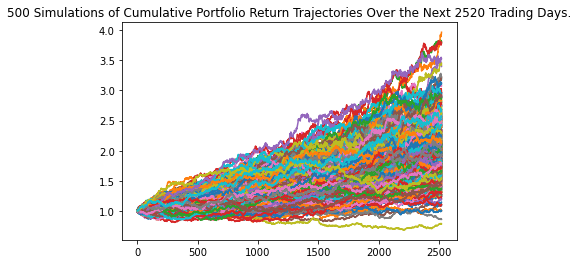

In [15]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

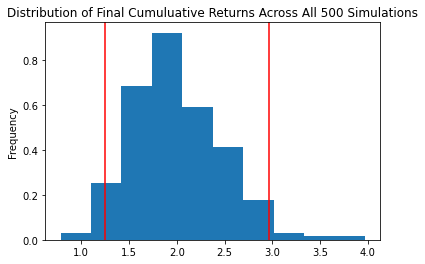

In [16]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [17]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              1.999517
std               0.472545
min               0.783802
25%               1.677932
50%               1.932055
75%               2.275620
max               3.967038
95% CI Lower      1.247649
95% CI Upper      2.960604
Name: 2520, dtype: float64


In [18]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $124764.88 and $296060.42


In [19]:
cum_returns = MC_even_dist.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Admin\Desktop\group_project_1\my_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

In [21]:
# Reverse cumulative return function for further calculations
def reverse_cum_return(df):
    return (1 + df) / (1 + df.shift(1)) - 1

In [22]:
simulation_returns = cum_returns.apply(reverse_cum_return, axis = 0)

In [23]:
simulation_returns.dropna(inplace = True)

In [24]:
simulation_returns.isna().sum().sum()

0

In [25]:
mean_expectation_simulations = simulation_returns.mean(axis = 1)

In [26]:
mean_expectation_simulations

1       0.000104
2       0.000049
3       0.000082
4       0.000164
5       0.000200
          ...   
2516    0.000318
2517    0.000182
2518    0.000414
2519    0.000188
2520    0.000169
Length: 2520, dtype: float64

In [27]:
# Annual Sharpe Ratio
mean_expectation_simulations.mean() * 252 /(mean_expectation_simulations.std() * (252**0.5))

19.82522526446521

In [28]:
mean_expectation_simulations.std() * np.sqrt(252)

0.002040304975223541

In [29]:
mean_expectation_simulations.mean() *252

0.04044950574201581

In [30]:
# Expected volatility for every day change
std_expectation_simu = simulation_returns.std(axis = 1) 

<AxesSubplot:>

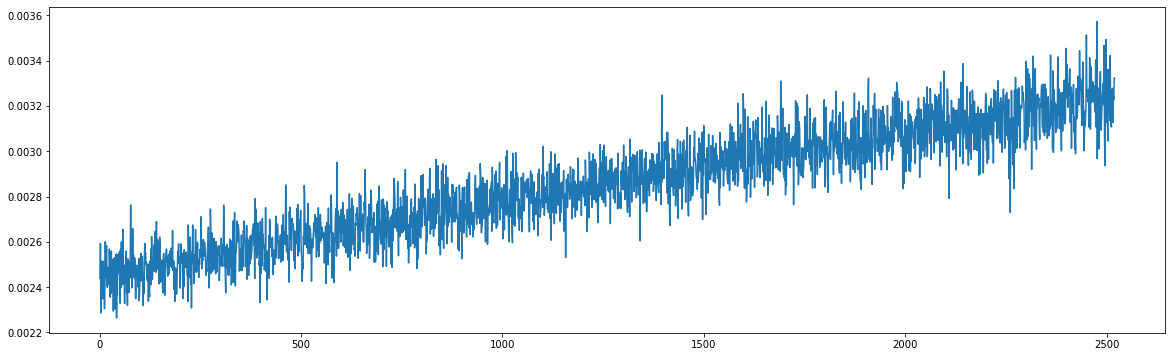

In [31]:
# Expected change for every simulation for every day in our returns (how much our rerun forecasts are changing every day based on the simulation of random numbers)
std_expectation_simu.plot(figsize = (20,6)) 

<AxesSubplot:>

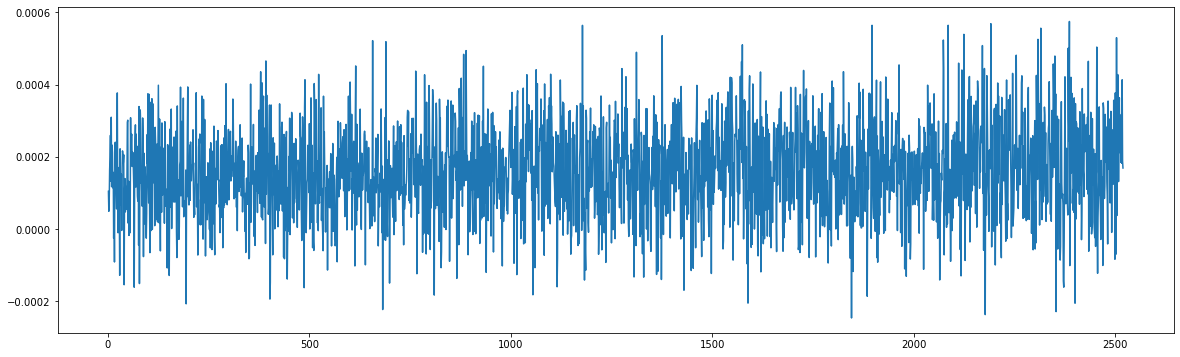

In [32]:
mean_expectation_simulations.plot(figsize = (20,6))

<AxesSubplot:>

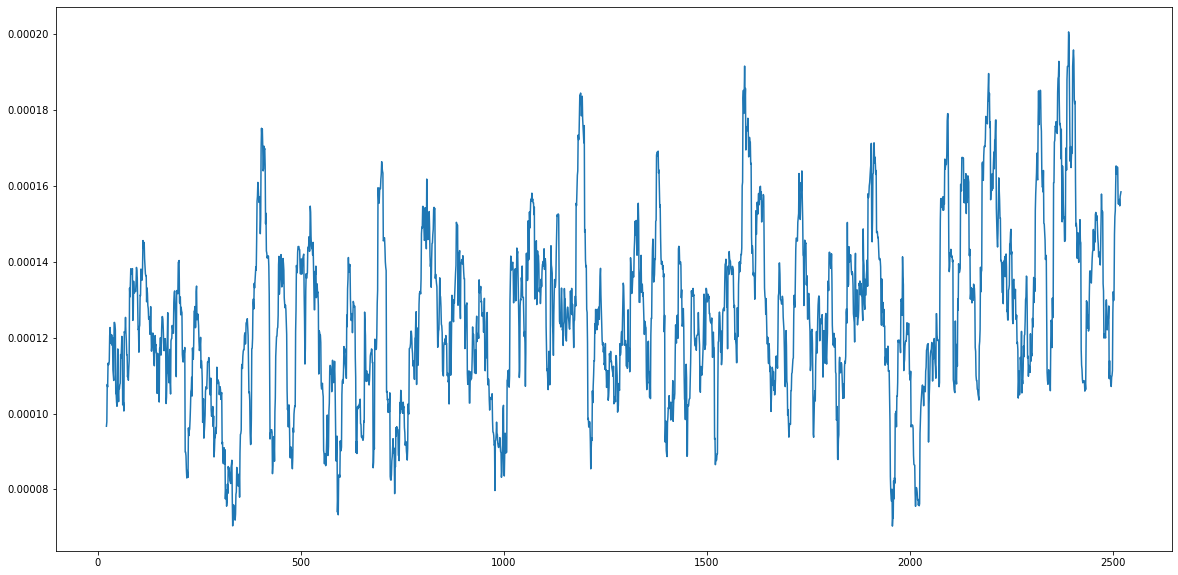

In [33]:
# Volatility of the expected simulation returns 
mean_expectation_simulations.rolling(21).std().plot(figsize = (20,10))